In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Read Data

In [64]:
df = pd.read_excel('./home price.xlsx')
df

,town,area,price
0,mondre township,2600,550000
1,mondre township,3000,565000
2,mondre township,3200,610000
3,mondre township,3600,680000
4,mondre township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbins ville,2600,575000


Create Dummy Variables

In [65]:
dummy = pd.get_dummies(df.town, dtype='int')
dummy

,mondre township,robbins ville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


Insert this dummy variable into main dataframe

In [66]:
merged_df = pd.concat([df,dummy], axis=1)
merged_df

,town,area,price,mondre township,robbins ville,west windsor
0,mondre township,2600,550000,1,0,0
1,mondre township,3000,565000,1,0,0
2,mondre township,3200,610000,1,0,0
3,mondre township,3600,680000,1,0,0
4,mondre township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbins ville,2600,575000,0,1,0


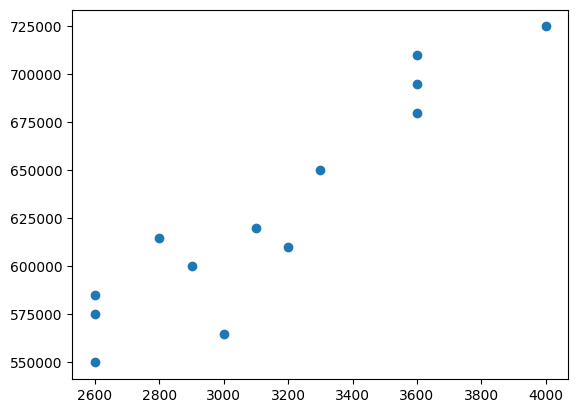

In [67]:
plt.scatter(df.area, df.price)

convention is to drop a dummy variable column

In [68]:
final_df = merged_df.drop(['town'],axis=1)
final_df

,area,price,mondre township,robbins ville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


Create Linear Regression model

In [69]:
reg = linear_model.LinearRegression()

x value = independent variable 

In [70]:
x = final_df.drop(['price'],axis=1)
x

,area,mondre township,robbins ville,west windsor
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0
5,2600,0,0,1
6,2800,0,0,1
7,3300,0,0,1
8,3600,0,0,1
9,2600,0,1,0


y value = dependent variable 

In [71]:
y = final_df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

Train Model

In [72]:
reg.fit(x,y)
# reg.fit(final_df[['area','mondre township','robbins ville']],final_df.price)

LinearRegression()

Predict data

In [73]:
reg.predict([[2800,0,1,0]])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.6396474])

In [74]:
reg.predict([[3400,0,0,1]])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

Test the Model Score

In [75]:
reg.score(x,y)

0.9573929037221872